In [1]:
import os
import sys
import torch
import os.path as op
import numpy as np
import pickle as pkl
from matplotlib import pyplot as plt
import torch.nn.functional as F
sys.path.append('..')

In [2]:
path1 = r'/mnt/nfs/work1/trahman/zhongyangzha/dvs_hpe/ntore_dataset/masks_acc/Albedo/front_alpha/5.npz'
path2 = r'/mnt/nfs/work1/trahman/zhongyangzha/dvs_hpe/ntore_dataset/masks_acc/Albedo/front_alpha/0.02.npz'

In [27]:
mask_loader1 = np.load(path1, allow_pickle=True)
mask_loader2 = np.load(path2, allow_pickle=True)

In [29]:
print(len(mask_loader1.keys()), len(mask_loader2.keys()))

2999 2999


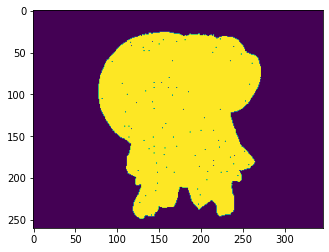

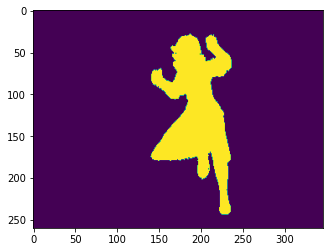

In [30]:
idx = 2800
mask1 = mask_loader1.get(str(idx))
mask2 = mask_loader2.get(str(idx))
plt.figure()
plt.imshow(mask1)
plt.figure()
plt.imshow(mask2)


In [32]:
x=9.0
print(str(x))

9.0


In [26]:
with open('./results/res.pkl', 'rb') as f:
    res = torch.tensor(pkl.load(f))

with open('./results/label.pkl', 'rb') as f:
    label = torch.tensor(pkl.load(f))

In [27]:
F.binary_cross_entropy(res, label)

RuntimeError: all elements of input should be between 0 and 1

In [9]:
label.shape

torch.Size([16, 260, 346])

In [5]:
F.sigmoid(res[1]).min()

/home/zhongyangzha/anaconda3/envs/dvs_pose/lib/python3.8/site-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor(0.0196)

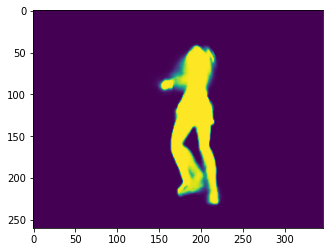

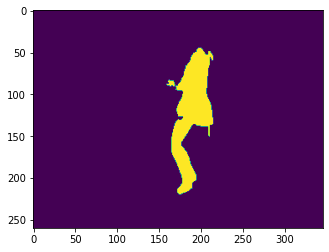

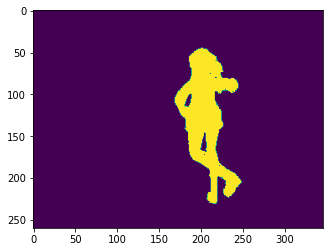

In [28]:
res_binary = np.where(res.numpy()[0]>0.25,1,0)
plt.figure()
plt.imshow(F.sigmoid(res[1]))
plt.figure()
plt.imshow(res_binary)
plt.figure()
plt.imshow(label[0])

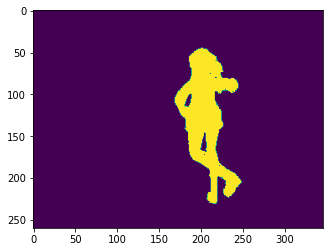

In [44]:
label[0].max()

1.0

In [31]:
NAME_DICT = {
        0.02: '0.02.npz',
        5: '5.npz'
    }
x=0.02
NAME_DICT[x]

'0.02.npz'

In [4]:
from scripts.utils.file_utils import MaskSeqReader

In [5]:
reader = MaskSeqReader(root = '/mnt/nfs/work1/trahman/zhongyangzha/dvs_hpe/ntore_dataset/masks_acc/Albedo/front_alpha', acc_time=0.02)

In [6]:
reader.read_acc_frame(1002)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [46]:
x, y = torch.rand(3,4), torch.rand(3,4)
torch.stack((x,y)).shape

torch.Size([2, 3, 4])